In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df=pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [6]:
df.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


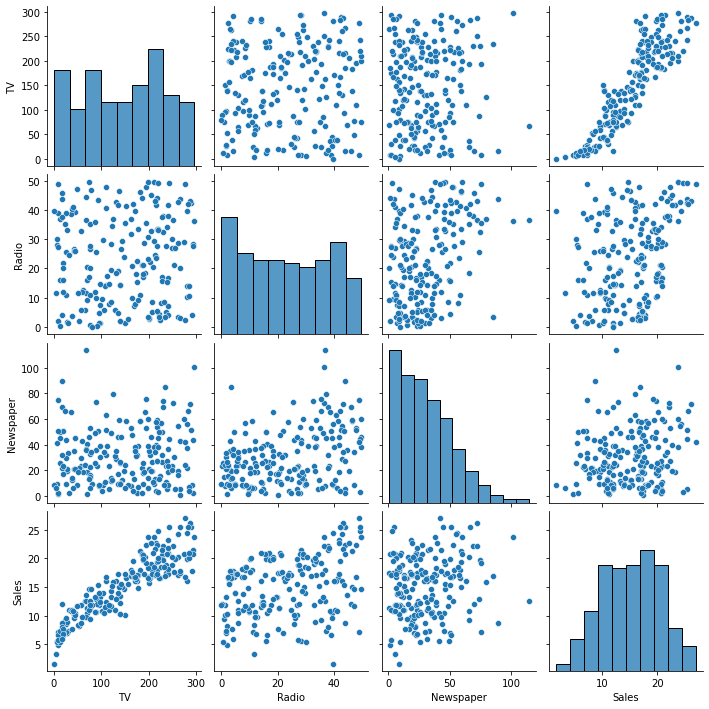

In [10]:
sns.pairplot(df)
plt.show()

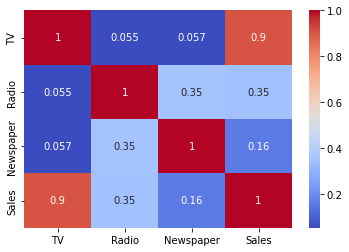

In [11]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [13]:
average_sales=df['Sales'].mean()
print('Average Sales:',average_sales)

Average Sales: 15.130500000000005


# Histogram of Sales

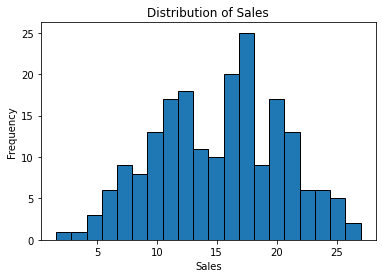

In [15]:
plt.hist(df['Sales'],bins=20,edgecolor='k')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

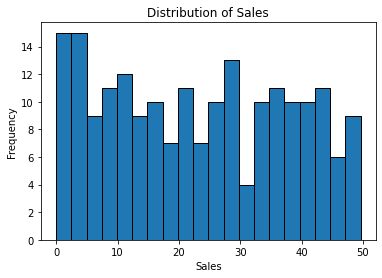

In [16]:

plt.hist(df['Radio'],bins=20,edgecolor='k')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

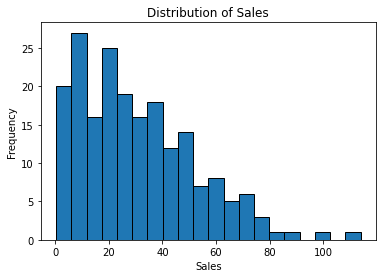

In [17]:
plt.hist(df['Newspaper'],bins=20,edgecolor='k')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

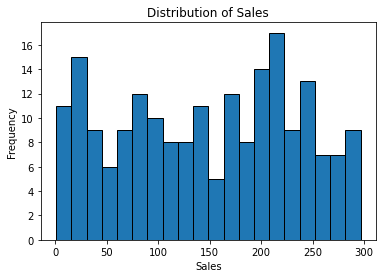

In [18]:
plt.hist(df['TV'],bins=20,edgecolor='k')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

# Scatter Plots for individual Advertising Channels

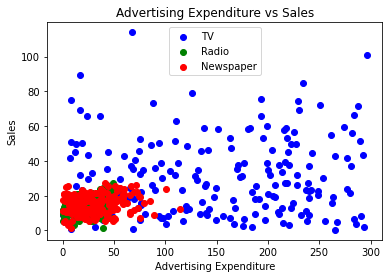

In [21]:
plt.scatter(df['TV'],df['Newspaper'],c='blue',label='TV')
plt.scatter(df['Radio'],df['Sales'],c='green',label='Radio')
plt.scatter(df['Newspaper'],df['Sales'],c='red',label='Newspaper')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.title('Advertising Expenditure vs Sales')
plt.show()

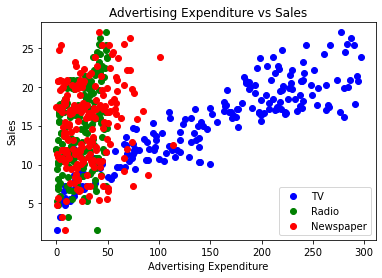

In [22]:
plt.scatter(df['TV'],df['Sales'],c='blue',label='TV')
plt.scatter(df['Radio'],df['Sales'],c='green',label='Radio')
plt.scatter(df['Newspaper'],df['Sales'],c='red',label='Newspaper')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.title('Advertising Expenditure vs Sales')
plt.show()

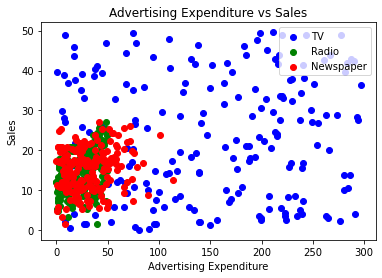

In [23]:
plt.scatter(df['TV'],df['Radio'],c='blue',label='TV')
plt.scatter(df['Radio'],df['Sales'],c='green',label='Radio')
plt.scatter(df['Newspaper'],df['Sales'],c='red',label='Newspaper')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.title('Advertising Expenditure vs Sales')
plt.show()

# Box Plot

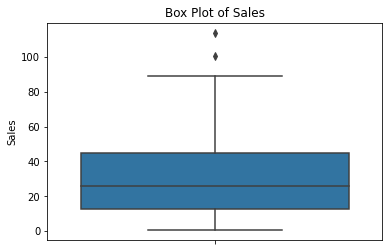

In [25]:
sns.boxplot(y=df['Newspaper'])
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

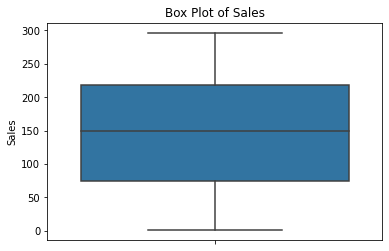

In [26]:
sns.boxplot(y=df['TV'])
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

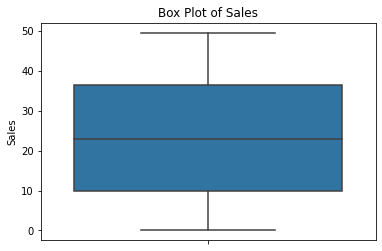

In [27]:
sns.boxplot(y=df['Radio'])
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

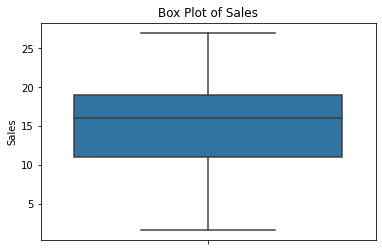

In [28]:
sns.boxplot(y=df['Sales'])
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

In [30]:
#descriptive statistics
summary_stats=df['Sales'].describe()

Q1=df['Sales'].quantile(0.25)
Q3=df['Sales'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=df[(df['Sales']<lower_bound)|(df['Sales']>upper_bound)]
print("Summary statistics for sales:")
print(summary_stats)
print("\nPotential Outliers:")
print(outliers)

Summary statistics for sales:
count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

Potential Outliers:
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


# Feature selection and Model training

In [32]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [34]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Model evaluation

In [35]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R-Squared:",r2)

Mean Squared Error: 2.9077569102710905
R-Squared: 0.9059011844150826


# Predictions


In [36]:
new_data=pd.DataFrame({'TV':[200],'Radio':[40],'Newspaper':[20]})
predicted_sales=model.predict(new_data)
print("Predicted Sales:",predicted_sales[0])

Predicted Sales: 19.740528001816998
